In [55]:
from datascience import *
from urllib.request import urlopen
import numpy as np
%matplotlib inline
import pandas 
import matplotlib 
import matplotlib.pyplot as plots 
import matplotlib.pyplot as plt

party_table_all_years = pandas.read_csv("countypres_2000-2020.csv")
party_table_all_years["county"] = party_table_all_years["county_name"] + ", " + party_table_all_years["state_po"]
party_table_2020 = party_table_all_years[party_table_all_years["year"].eq(2020)]
party_table_final = party_table_2020[["candidatevotes","county","party","totalvotes"]]
max_rows = party_table_final.groupby(["county"])["candidatevotes"].transform(max) == party_table_final["candidatevotes"]
party_table = party_table_final[max_rows]
party_table1 = Table.from_df(party_table)
party_table1.sort("county", descending = False)

candidatevotes,county,party,totalvotes
4306,"ABBEVILLE, SC",REPUBLICAN,12433
22596,"ACADIA, LA",REPUBLICAN,28425
6078,"ACCOMACK, VA",REPUBLICAN,16962
130699,"ADA, ID",REPUBLICAN,259389
1717,"ADAIR, IA",REPUBLICAN,4177
7276,"ADAIR, KY",REPUBLICAN,8763
6413,"ADAIR, MO",REPUBLICAN,10336
4722,"ADAIR, OK",REPUBLICAN,7108
134202,"ADAMS, CO",DEMOCRAT,236740
781,"ADAMS, IA",REPUBLICAN,2160


In [65]:
emission = Table.read_table("Direct Emitters.csv")
emission_columns = emission.select("State","COUNTY","Total reported direct emissions")


"""def remove_county(pay_string):
    return (pay_string.strip("COUNTY"))
function_emission = emission_columns.apply(remove_county,"COUNTY")
function_emission
new_table = emission_columns.with_column("minus county", function_emission)
new_table"""

emission_pandas = Table.to_df(emission_columns)
emission_pandas["COUNTY"] = emission_pandas["COUNTY"].str.upper()
emission_pandas["COUNTY"] = emission_pandas["COUNTY"].str.replace("COUNTY","")
emission_pandas["COUNTY"] = emission_pandas["COUNTY"].str.replace(" PARISH","")
emission_pandas["Total reported direct emissions"] = emission_pandas["Total reported direct emissions"].str.replace(",","")
emission_pandas["COUNTY"] = emission_pandas["COUNTY"] + ", " + emission_pandas["State"]
emission_pandas
emission_numpy = Table.from_df(emission_pandas)
emission_table_final = emission_numpy.drop("State")
total_emissions = make_array()
def convert(string):
    float2 = float(string)
    return float2
for i in np.arange(0,len(emission_table_final.column("Total reported direct emissions"))):
    total_emissions = np.append(total_emissions, convert(emission_table_final.column("Total reported direct emissions").item(i)))
final_emissions_table = emission_table_final.with_column(
    "Total Emissions",total_emissions
). drop("Total reported direct emissions")
final_emissions_table.sort("COUNTY", descending = False)
final_emissions_table = final_emissions_table.group("COUNTY", np.sum).relabeled("Total Emissions sum", "Total Emissions")
final_emissions_table

COUNTY,Total Emissions
"ACADIA, LA",2.7949e+06
"ACCOMACK , VA",100640
"ACCOMACK, VA",18905.3
"ADA , ID",191425
"ADAMS , CO",1.08817e+06
"ADAMS , IA",104120
"ADAMS , IL",104084
"ADAMS , IN",79021.8
"ADAMS , MS",80621.9
"ADAMS , NE",369253


In [66]:
emissions_party_table = final_emissions_table.join("COUNTY",party_table1,"county")
final_2020 = emissions_party_table.with_column("Year", np.repeat(2020, emissions_party_table.num_rows))
final_2020

COUNTY,Total Emissions,candidatevotes,party,totalvotes,Year
"ACADIA, LA",2.7949e+06,22596,REPUBLICAN,28425,2020
"ACCOMACK, VA",18905.3,6078,REPUBLICAN,16962,2020
"ADAMS, CO",2.0832e+06,134202,DEMOCRAT,236740,2020
"ADAMS, NE",1.12036e+06,10085,REPUBLICAN,14602,2020
"ADAMS, PA",2.51474e+06,37523,REPUBLICAN,56540,2020
"AIKEN, SC",817324,27763,REPUBLICAN,85185,2020
"ALACHUA, FL",1.10912e+06,89704,DEMOCRAT,142604,2020
"ALAMEDA, CA",429884,617659,DEMOCRAT,770070,2020
"ALBANY, NY",2.01763e+06,99474,DEMOCRAT,154727,2020
"ALEXANDRIA CITY, VA",94252.7,55940,DEMOCRAT,82521,2020


In [58]:
final_2020.to_df().to_csv('final_2020.csv', index = False)

Text(0.5, 1.0, 'Average Total Emissions Per County, Stratified by Political Party')

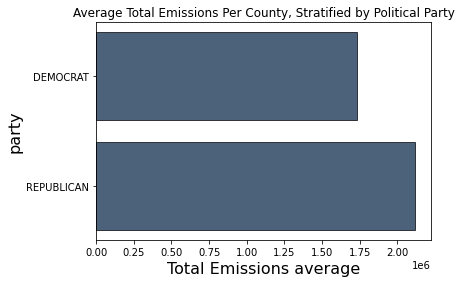

In [71]:
emission_plot = emissions_party_table.select("party","Total Emissions").group("party",np.average)
emission_plot.barh("party","Total Emissions average")
plots.title("Average Total Emissions Per County, Stratified by Political Party")

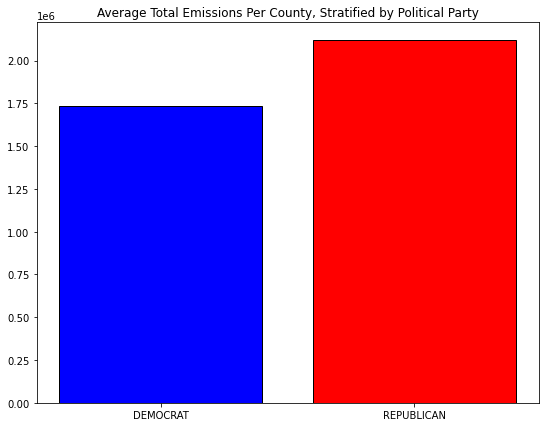

In [70]:
plt.figure(figsize=(9,7))

party = emission_plot.column("party")
emissions = emission_plot.column("Total Emissions average")

plt.bar(party, emissions, color=["blue", "red"])
plots.title("Average Total Emissions Per County, Stratified by Political Party")

plt.show()

In [73]:
emission_plot

party,Total Emissions average
DEMOCRAT,1.73369e+06
REPUBLICAN,2.1175e+06
